# Test PERMANOVA accuracy on simulated data



Tested with qiime2-amplicon-2023.9



## Check available files

In [6]:
from os import listdir
from os.path import join
import pandas as pd

data_dir = "../output"
listdir(data_dir)

['.DS_Store',
 'raw_sim_microbiome_tree_VCV.csv',
 'raw_sim_microbiome_trait_VCV.csv',
 'simulated_host_traits.csv',
 'raw_sim_microbiome_1000microbes.csv']

## Import QIIME2 and plugins

In [3]:
import qiime2
print(qiime2.__version__)

from qiime2.plugins import feature_table
#from qiime2.plugins import (demux, dada2, metadata, feature_table,
                            #fragment_insertion, diversity, 
                            #longitudinal, phylogeny, sample_classifier,
                            #feature_classifier, taxa, composition, 
                            #longitudinal)

from math import floor

2023.9.2


In [61]:
feature_data_fp = 'raw_sim_microbiome_1000microbes.csv'
feature_data = pd.read_csv(join(data_dir,feature_data_fp))
print(feature_data.columns)


feature_data = feature_data.rename(columns = {'Species':'#OTU ID'})
feature_data = feature_data.set_index('#OTU ID')


def convert_trait_to_count(trait,base=1.1,n_seqs = 10):
    """ Convert a trait (value -inf to +inf) to a microbiome count
    """
    scaling = 1
    new_trait = (base**trait)*n_seqs    
    new_trait *= scaling
    new_trait = new_trait.apply(floor)
    return new_trait

feature_data = feature_data.apply(convert_trait_to_count)
#columns = list(feature_data.columns)
#columns[0] = 'Taxa'
#feature_data.columns = columns
print(feature_data)
feature_data.transpose().to_csv(join(data_dir,"feature_table.csv"),sep="\t")

Index(['Species', 'microbe_1', 'microbe_2', 'microbe_3', 'microbe_4',
       'microbe_5', 'microbe_6', 'microbe_7', 'microbe_8', 'microbe_9',
       ...
       'microbe_991', 'microbe_992', 'microbe_993', 'microbe_994',
       'microbe_995', 'microbe_996', 'microbe_997', 'microbe_998',
       'microbe_999', 'microbe_1000'],
      dtype='object', length=1001)
                                microbe_1  microbe_2  microbe_3  microbe_4  \
#OTU ID                                                                      
COR_Discosoma                           2          4         39          2   
COR_Ricordea_florida                   11          7         42          5   
MIC_Letepsammia                         1         40          1         24   
MIC_Rhombopsammia                       1         70          2         12   
MIC_Stephanophyllia                     1         66          2         11   
...                                   ...        ...        ...        ...   
ACR_Acropora_ch

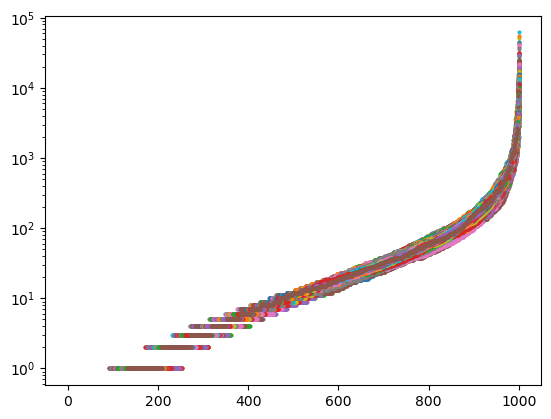

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
for species in feature_data.index:
    y = sorted(list(feature_data.loc[species,:]))
    plt.scatter(range(len(y)),y, s = 4)
    plt.yscale("log")

In [63]:
!biom convert -i ../output/feature_table.csv -o ../output/feature_table_json.biom --table-type="OTU table" --to-json

In [64]:
!qiime tools import --input-path ../output/feature_table_json.biom --type 'FeatureTable[Frequency]' --input-format BIOMV100Format --output-path ../output/feature_table.qza
!qiime tools validate ../output/feature_table.qza

Imported ../output/feature_table_json.biom as BIOMV100Format to ../output/feature_table.qza
Result ../output/feature_table.qza appears to be valid at level=max.


In [65]:

feature_table = qiime2.Artifact.load("../output/feature_table.qza")

In [ ]:
from qiime2.plugins.feature_table.methods import rarefy

sequence_depth = 10000
rarefaction_results = rarefy(feature_table,sequence_depth)
print(rarefaction_results)

In [ ]:
rarefied_table = rarefaction_results.rarefied_table
rarefied_table.save(join(data_dir,'raw_sim_microbiome_1000microbes_rarefied_1000.qza'))

In [72]:
# calculate beta diversity distance matrix
# Load metadata
# run PERMANOVA
# Extract p value (do qualitatively at first - I think I have code in either GCMP global disease or 
# coral microbe coevolution that can rip out the p-values from the QIIME2 qzv)

# Let's read up on the best way to turn our -inf to +inf scaled microbe abundances into counts

'../output/raw_sim_microbiome_1000microbes_rarefied_1000.qza'